# California Housing Regression
---
## What are we going to do?
In this quick demo, we will use JAI to:
* Train and deploy models into a secure and scalable production-ready environment.
* Regression - Determine how each analyzed attribute influences the value of the house
* Model inference - Predict the value of new houses and check the results
---

## Importing Libraries

In [ ]:
%%time
# deps installation
try:
  from jai import Jai
except ImportError:
  !pip install --user --upgrade jai-sdk
  print('Stopping RUNTIME! Please run again.')
  import os
  os.kill(os.getpid(), 9)

CPU times: user 10 µs, sys: 1 µs, total: 11 µs
Wall time: 16.2 µs


In [ ]:
import pandas as pd
import numpy as np
from jai import Jai
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


---

# JAI Auth Key

If you don't already have an auth key, you can get your auth key here - free forever. Also, please make sure to check your spam folder if you can't find it in your inbox!


In [ ]:
Jai.get_auth_key(email = 'email@emailnet.com', firstName = 'JAI', lastName = 'Z')

<Response [201]>

In [ ]:
# Use your key here to start JAI:
AUTH_KEY = "43ad899e83164636a5bf2eb782bc8543"
j = Jai(AUTH_KEY)

---

## Dataset quick look

This dataset contains data collected by the 1990 U.S. Census concerning housing in the state of California. It contains data such as average number of rooms per dwelling per block group,  median income in block group and block group population, a block group being the smallest geographical unit per which the U.S. Census publishes data (typically an area ranging from 600-3000 in population). As the target, the dataset contains the median value of a house per block  group, expressed in hundreds of thousands of dollars.

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_df = pd.DataFrame(data = california_housing.data, columns = california_housing.feature_names)
# target is true median value of house per block group
california_df['price'] = california_housing.target

In [ ]:
california_df.info()
# More information about what each column represents can be found on https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Showing first five rows of DataFrame
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


---
## Inserting data into Jai
To be able to use Jai's functionalities, we first need to turn the data into a Jai collection. The method used to send data to Jai is j.setup (or j.fit; they are the same), which can then be consumed through the methods j.similar and j.predict. By using the setup method you add your raw data to your JAI environment, use the data to train your model based on the chosen model type and your model’s latent vector representation is then stored in the Jai collection.

Insert Data: 100%|██████████| 2/2 [00:08<00:00,  4.49s/it]



Recognized setup args:
- db_type: Supervised
- label: 
  * task      : regression
  * label_name: price
- split: {}
- overwrite: True

Training might finish early due to early stopping criteria.


JAI is working: 100%|██████████|22/22 [01:32]


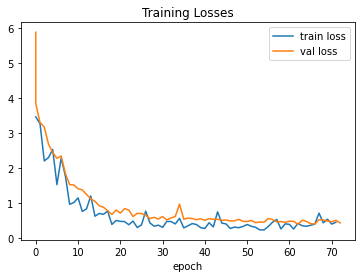


Setup Report:
Metrics Regression:
MAE: 0.42605888843536377
MSE: 0.4013962745666504
MAPE: 0.23399828374385834
R2 Score: 0.6936862638244422
Pinball Loss 0.5: 0.21302944421768188

Best model at epoch: 62 val_loss: 0.40


({0: {'Description': 'Insertion completed.',
   'Interrupted': False,
   'Status': 'Completed',
   'Task': 'Adding new data for tabular setup'},
  1: {'Description': 'Insertion completed.',
   'Interrupted': False,
   'Status': 'Completed',
   'Task': 'Adding new data for tabular setup'}},
 {'Description': 'Check status after some time!',
  'Status': 'Job Created',
  'Task': 'Training Model',
  'kwargs': {'db_type': 'Supervised',
   'label': '{"task": "regression", "label_name": "price", "regression_scaler": "None", "quantiles": []}',
   'overwrite': True,
   'split': '{}'}})

In [ ]:
j.setup(
    #JAI collection name
    name = 'california_housing',

    #data to be processed - a Pandas DataFrame is expected
    data = california_df,

    #collection type
    db_type = 'Supervised',

    #verbose 2 -> shows the loss graph at the end of training
    verbose = 2,

    label =
    {
        'task':'regression',
        'label_name':'price'
    },
    
    # Overwrite allows you to overwrite other existing databases with the same name
    overwrite = True
)

---
## Model Inference
We can use the trained model for inference

In [ ]:
# every JAI Supervised collection can be used for inference using j.predict()
ans = j.predict(
    # collection to be queried
    name = 'california_housing',
    # Remember to drop the label as it is not a feature!
    # Predicting the value of the first 5 houses in the dataset
    data = california_df.head(1).drop('price',axis = 1),
    as_frame = True
)

Predict Processing: 100%|██████████| 1/1 [00:00<00:00, 8793.09it/s]


In [ ]:
ans['Target'] = california_housing.target
ans

,predict,Target
id,,
0,3.929891,4.526
